<a href="https://colab.research.google.com/github/kingtang23/finance-stock-visualization-and-ML/blob/main/dataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
from datetime import date
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
import random
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

Calling yfinance api to retrieve data from yahoo! finance

# Exploratory Data Analysis


In [ ]:
import yfinance as yf

Retrieve 3 major stocks
1. Microsoft
2. Apple
3. Google

in the span of the last 5 years, and we will group the dataframe by the ticker names

In [ ]:
stock_data = yf.download(['MSFT', 'AAPL', 'GOOG'], period='5y', group_by='ticker')
stock_data.head()
#by default, the "Close" column is already the adjusted close price of the stocks

/tmp/ipython-input-3780052277.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  3 of 3 completed


Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-12-30  216.117139  216.500963  212.509275  212.710770  20272300   
2020-12-31  212.729952  213.977357  210.791678  213.420822  20942100   
2021-01-04  213.526418  213.977403  206.118768  208.882248  37130100   
2021-01-05  208.469605  209.678634  206.972725  209.083710  23823000   
2021-01-06  203.585589  207.730808  203.364898  203.662354  35930700   

Ticker           GOOG                                                   AAPL  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2020-12-30  87.444655  87.597757  85.637704  86.328522  26122000  131.980681   
2020-12-31  86.125039  87.291787  86.125039  86.941910  20238000  130.520502   
2021-01-04  87.222821  87.377165  84.756819  85.768730  38038000  129.975346   
2021-01-05  85.607931  86.732992  85.261280  86.398003  22906000  125.468253   
2021-01-06  84.497752  86.749366  84.317600  86.118599  52042000  124.329313   

Ticker                                                     
Price             High         Low       Close     Volume  
Date                                                       
2020-12-30  132.379800  129.858547  130.170059   96452100  
2020-12-31  131.162985  128.223154  129.167404   99116600  
2021-01-04  130.062953  123.394807  125.974457  143301900  
2021-01-05  128.242598  125.020459  127.531967   97664900  
2021-01-06  127.570911  123.024884  123.239044  155088000

In [ ]:
stock_data.shape


(1255, 15)

As we can see, there is a total of 1255 rows, meaning over the past 5 years, there has been a total of 1255 trading days for the stocks that we have chosen.

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-12-30 to 2025-12-29
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (MSFT, Open)    1255 non-null   float64
 1   (MSFT, High)    1255 non-null   float64
 2   (MSFT, Low)     1255 non-null   float64
 3   (MSFT, Close)   1255 non-null   float64
 4   (MSFT, Volume)  1255 non-null   int64  
 5   (GOOG, Open)    1255 non-null   float64
 6   (GOOG, High)    1255 non-null   float64
 7   (GOOG, Low)     1255 non-null   float64
 8   (GOOG, Close)   1255 non-null   float64
 9   (GOOG, Volume)  1255 non-null   int64  
 10  (AAPL, Open)    1255 non-null   float64
 11  (AAPL, High)    1255 non-null   float64
 12  (AAPL, Low)     1255 non-null   float64
 13  (AAPL, Close)   1255 non-null   float64
 14  (AAPL, Volume)  1255 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 156.9 KB


There is also no missing values for any of the days in the past 5 years.

We now then look at a very high level overview of the individual columns (which are all numerical) among the three stocks

In [ ]:
stock_data.describe()

Ticker         MSFT                                                       \
Price          Open         High          Low        Close        Volume   
count   1255.000000  1255.000000  1255.000000  1255.000000  1.255000e+03   
mean     342.225437   345.350247   338.945270   342.289645  2.554458e+07   
std       89.466662    89.722183    88.960925    89.349216  1.009057e+07   
min      203.585589   205.830841   203.364898   203.662354  5.855900e+06   
25%      263.208323   267.307681   260.471446   263.952332  1.894115e+07   
50%      324.266072   326.830122   321.002670   323.840363  2.317610e+07   
75%      414.600326   417.711275   410.860037   413.928726  2.948910e+07   
max      553.283183   553.502444   539.759814   541.057373  9.042890e+07   

Ticker         GOOG                                                       \
Price          Open         High          Low        Close        Volume   
count   1255.000000  1255.000000  1255.000000  1255.000000  1.255000e+03   
mean     146.231782   147.935284   144.663649   146.326739  2.456039e+07   
std       45.465070    45.916127    44.904508    45.435555  1.042484e+07   
min       84.497752    85.905703    82.828774    82.868477  6.138200e+06   
25%      114.867476   116.495522   113.651218   114.924538  1.773885e+07   
50%      137.320109   138.590548   135.956811   137.406418  2.205960e+07   
75%      167.218829   168.668137   165.033621   167.183067  2.838300e+07   
max      326.586898   328.455705   319.771365   323.428986  9.779860e+07   

Ticker         AAPL                                                       
Price          Open         High          Low        Close        Volume  
count   1255.000000  1255.000000  1255.000000  1255.000000  1.255000e+03  
mean     179.137245   181.081525   177.370026   179.313684  6.993193e+07  
std       39.914975    40.195859    39.677881    39.969323  2.992929e+07  
min      116.043177   117.378796   113.293948   113.440186  1.791060e+07  
25%      145.832774   147.593806   144.586487   146.054382  4.841050e+07  
50%      171.372045   173.118410   169.739582   171.629944  6.314910e+07  
75%      210.070460   212.363464   207.706211   210.418686  8.483335e+07  
max      286.200012   288.619995   283.299988   286.190002  3.186799e+08

In [ ]:
# .xs stands for cross-section
close_prices = stock_data.xs('Close', axis=1, level=1)
close_prices.head()

Ticker,MSFT,GOOG,AAPL
Date,,,
2020-12-30,212.710770,86.328522,130.170059
2020-12-31,213.420822,86.941910,129.167404
2021-01-04,208.882248,85.768730,125.974457
2021-01-05,209.083710,86.398003,127.531967
2021-01-06,203.662354,86.118599,123.239044


In [ ]:

import missingno as ms

If there were any missing values, we could also implement missingno to visualize where the missing values exist.

<Axes: >

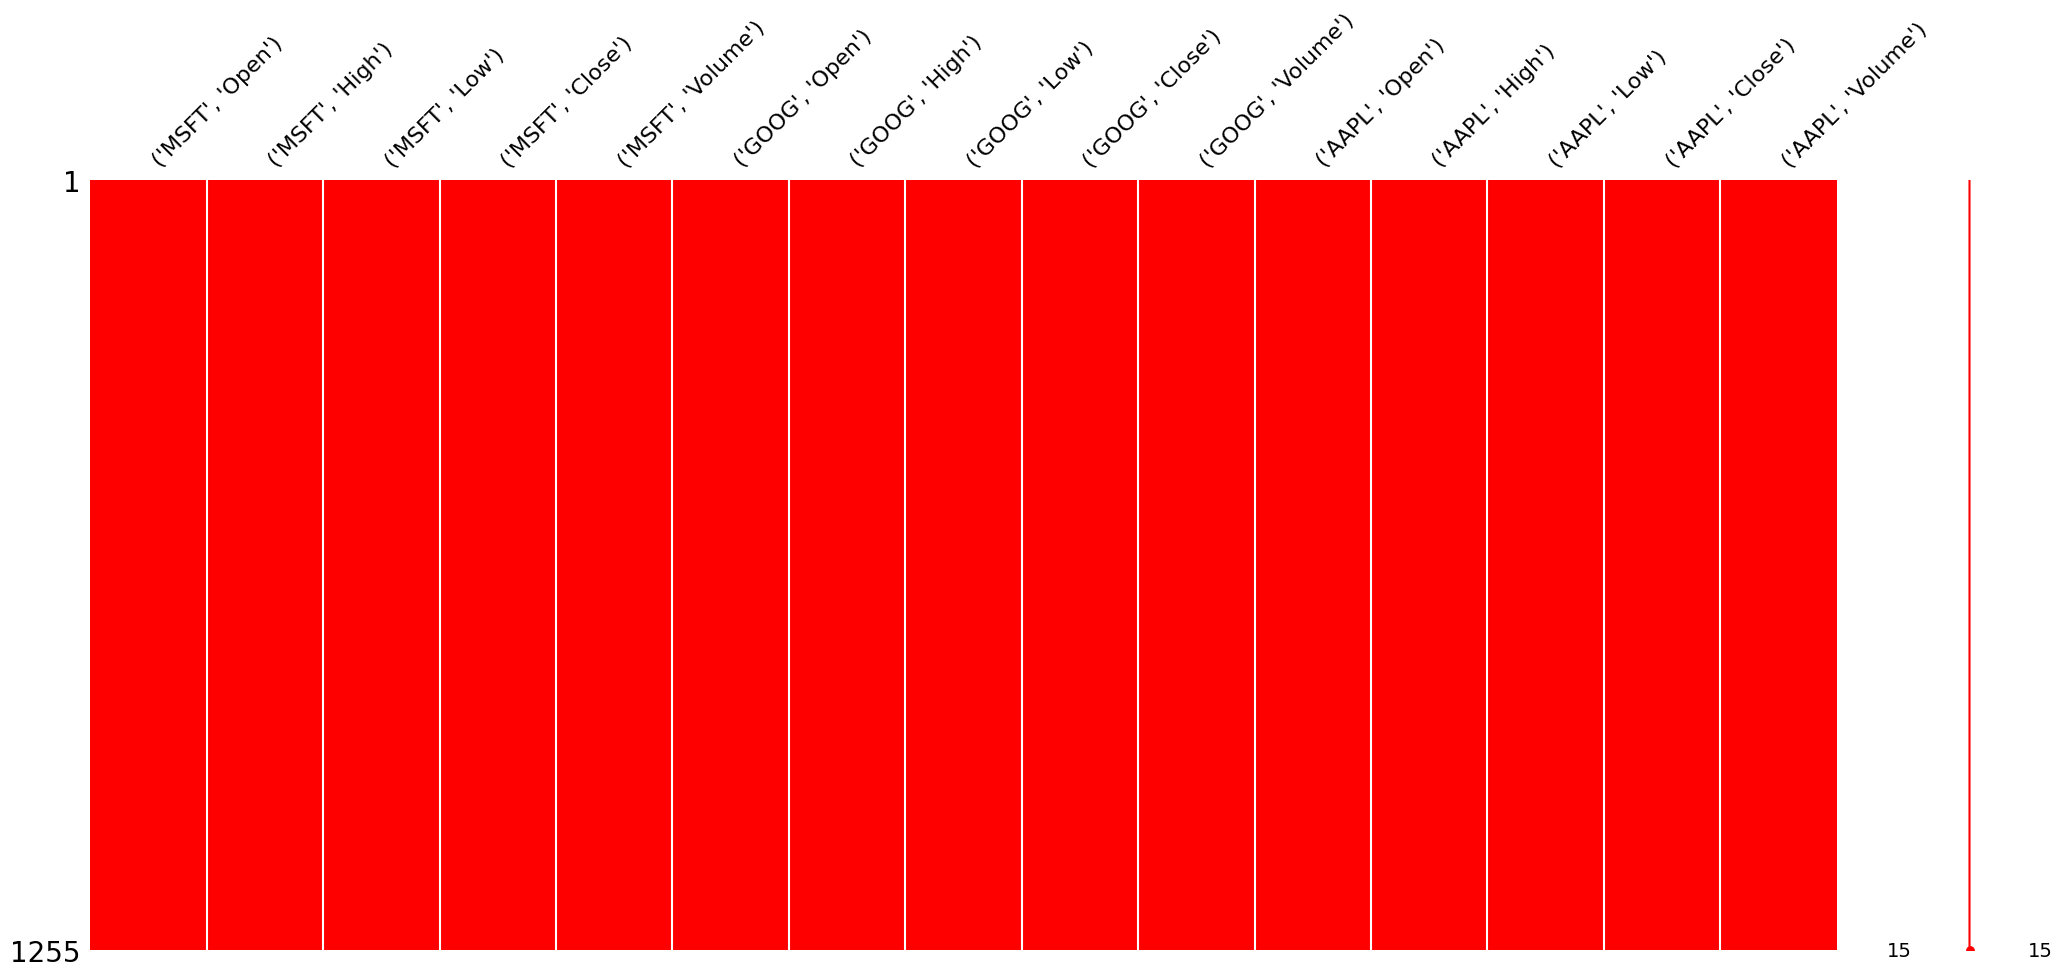

In [ ]:
ms.matrix(stock_data, color=(1, 0, 0)) # Red color
#no missing values present in the 1 year mark

Text(0, 0.5, 'Close Prices')

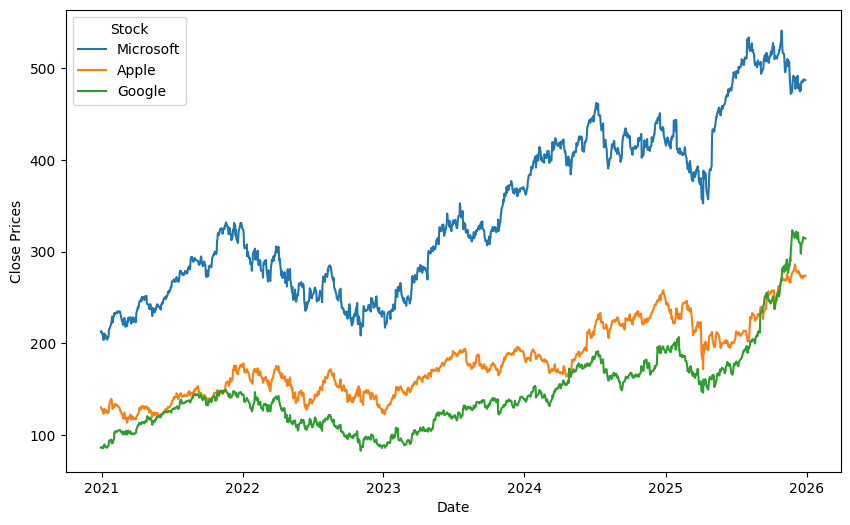

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(close_prices['MSFT'], label='Microsoft')
plt.plot(close_prices['AAPL'], label='Apple')
plt.plot(close_prices['GOOG'], label='Google')
plt.legend(title="Stock",loc="best")
plt.xlabel('Date')
plt.ylabel('Close Prices')


Text(0, 0.5, 'Close Prices')

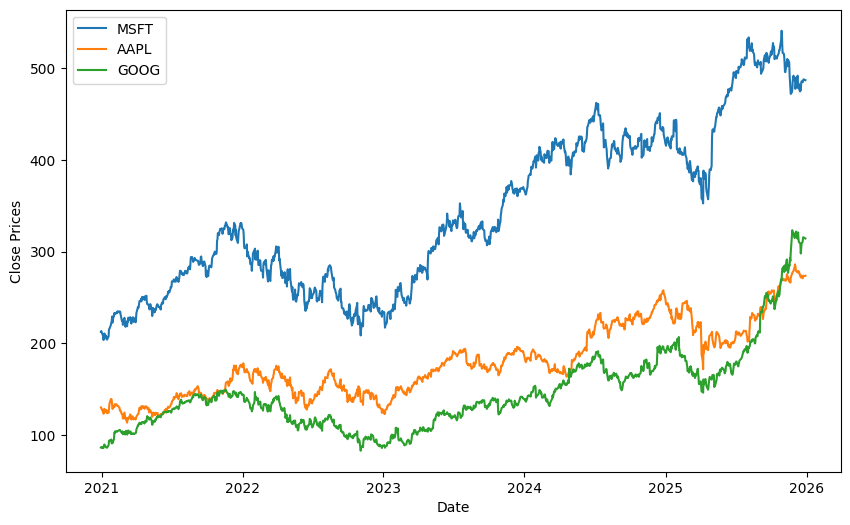

In [ ]:
plt.figure(figsize=(10, 6))
stock_list = ['MSFT','AAPL','GOOG']
for stock in stock_list:
  plt.plot(close_prices[stock], label = stock)
  plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Close Prices')

**Daily Returns**

In [ ]:
returns_data = close_prices.pct_change()
returns_data.head()

Ticker,MSFT,GOOG,AAPL
Date,,,
2020-12-30,NaN,NaN,NaN
2020-12-31,0.003338,0.007105,-0.007703
2021-01-04,-0.021266,-0.013494,-0.024719
2021-01-05,0.000964,0.007337,0.012364
2021-01-06,-0.025929,-0.003234,-0.033662


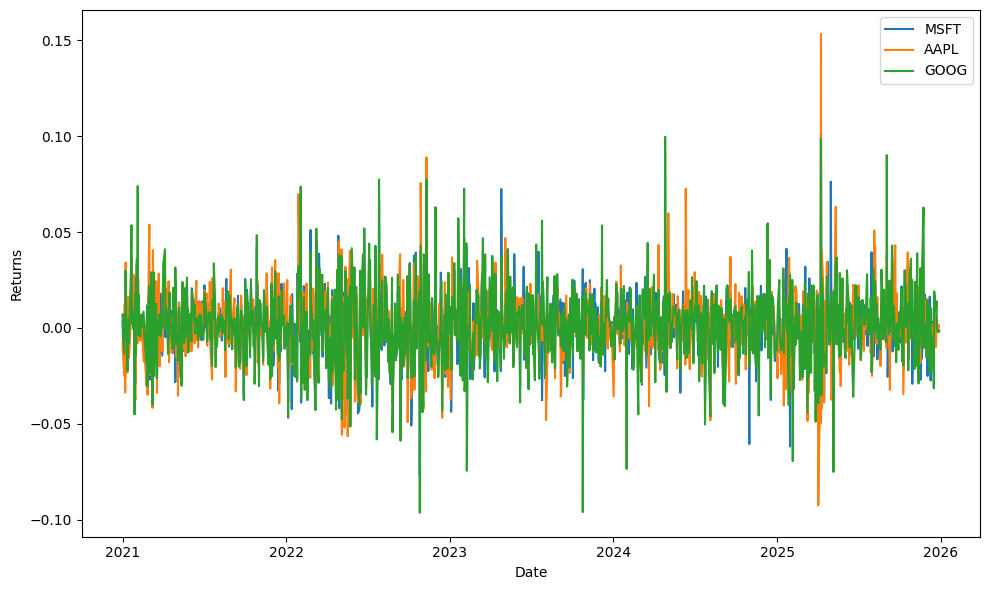

In [ ]:
plt.figure(figsize = (10,6))
for stock in stock_list:
  plt.plot(returns_data[stock],label = stock)

plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Returns')
plt.tight_layout()

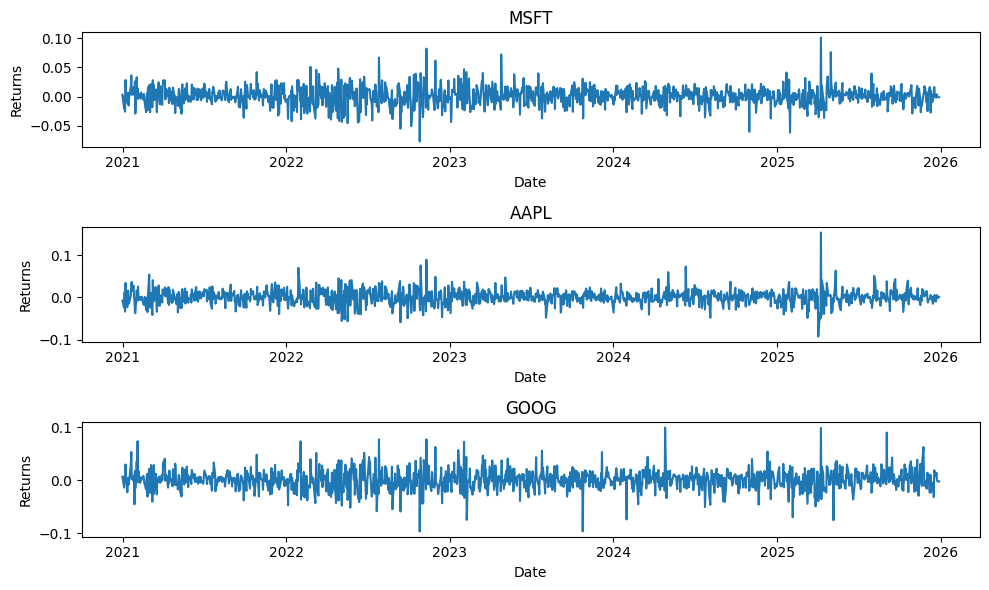

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(10,6))

for i,stock in enumerate(stock_list):
  ax[i].plot(returns_data[stock])
  ax[i].set_title(stock)
  ax[i].set_xlabel('Date')
  ax[i].set_ylabel('Returns')

plt.tight_layout()

In [ ]:
corr_matrix = returns_data.corr()
corr_matrix

Ticker,MSFT,GOOG,AAPL
Ticker,,,
MSFT,1.000000,0.644648,0.634384
GOOG,0.644648,1.000000,0.578181
AAPL,0.634384,0.578181,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

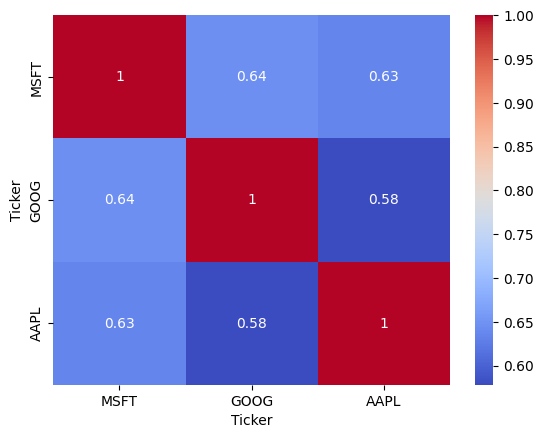

In [ ]:
import seaborn as sns

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')


There does not live a very strong correlation between the three stocks daily returns over the past 5 years as shown in the heatmap - possibly due to the differences & variety of products each of the company provides.

# Statiscal Forecasting using ARIMA

We now focus on one specific stock: Microsoft.

In [ ]:
msft = yf.Ticker("MSFT")
msft.info['ebitda']
print(type(msft))

<class 'yfinance.ticker.Ticker'>


In [ ]:
msft.info
# this calls and returns a wide variety of infromation avaliable from the stock
#such as ebitda value etc

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Microsoft Corporation develops and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Microsoft 365 Commercial, Enterprise Mobility + Security, Windows Commercial, Power BI, Exchange, SharePoint, Microsoft Teams, Security and Compliance, and Copilot; Microsoft 365 Commercial products, such as Windows Commercial on-premises and Office licensed services; Microsoft 365 Consumer products and cloud services, such as Microsoft 365 Consumer subscriptions, Office licensed on-premises, and other consu

In [ ]:
msft.info.get("ebitda")

166436995072

In [ ]:


tickers = yf.Tickers("MSFT AAPL GOOG")

info = pd.DataFrame(columns=["ebitda"])

for ticker, value in tickers.tickers.items():
    info.loc[ticker, "ebitda"] = value.info.get("ebitda")
    #loc assigns the RHS value into LHS row,column
info


,ebitda
MSFT,166436995072
AAPL,144748003328
GOOG,145174003712


In [ ]:
tickers.tickers.items()

dict_items([('MSFT', yfinance.Ticker object <MSFT>), ('AAPL', yfinance.Ticker object <AAPL>), ('GOOG', yfinance.Ticker object <GOOG>)])

In [ ]:
#specifically looking at GOOG over the past 5 years
# first we need to check for stationarity using the ADFULLER test BUT ONLY FOR
# UNIVARIATE TIME SERIES (multi variate requires other tests)


which it is in our case, since we are only looking at the (adjusted) close price

In [ ]:
df = close_prices["MSFT"]
px.line(df)

In [ ]:
#Variance?


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-12-30 to 2025-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    1255 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB


Visually, there is clearly an upwards trend on the stock , which means that the time series is not stationary to begin with

In [ ]:
hypo1 = adfuller(df)
hypo1
#where the 2nd value is the "p-value"

(np.float64(-0.9118350314472169),
 np.float64(0.7840499906717575),
 0,
 1254,
 {'1%': np.float64(-3.4355754676859886),
  '5%': np.float64(-2.8638475772391665),
  '10%': np.float64(-2.5679985805677017)},
 np.float64(7583.362928747538))

Clearly at 5% significance level, the p-value is much greater than the critical values at all the respective signifcance values, meaning that the tiem series w/o differenicng is non-stationary; meaning that we have to incorporate differencing to the time series

In [ ]:
first_diffs = df - df.shift(1)

# difference 1
first_diffs.dropna(inplace=True)
hypo2 = adfuller(first_diffs)
hypo2

(np.float64(-22.050843010067766),
 0.0,
 2,
 1251,
 {'1%': np.float64(-3.4355880246374304),
  '5%': np.float64(-2.8638531175675896),
  '10%': np.float64(-2.568001531098063)},
 np.float64(7577.805696841185))

Now, the ADF test value is significantly lower than that of the values at the significant values (1%, 5%, 10%) meaning that we can consider the 1st difference time sequence to be of stationary value

In [ ]:
first_diffs.head()

,MSFT
Date,
2020-12-31,0.710068
2021-01-04,-4.538635
2021-01-05,0.201508
2021-01-06,-5.421356
2021-01-07,5.795593


In [ ]:
px.line(first_diffs)
# we plot the first differenced time series which is a univariate and which is a
# stationary as shown in the plot with a constant mean and of some what variance

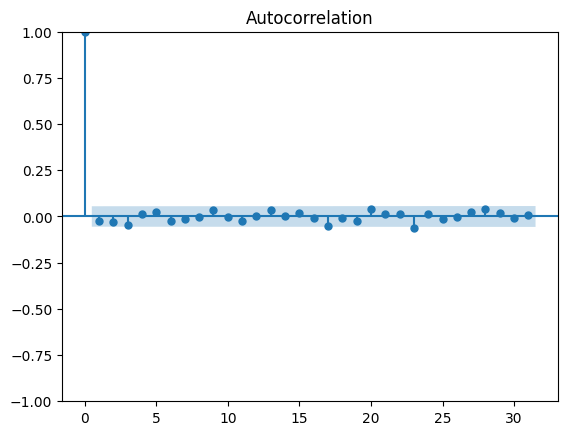

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_acf(first_diffs)
plt.show()
plt.tight_layout()
# to find the other of MA

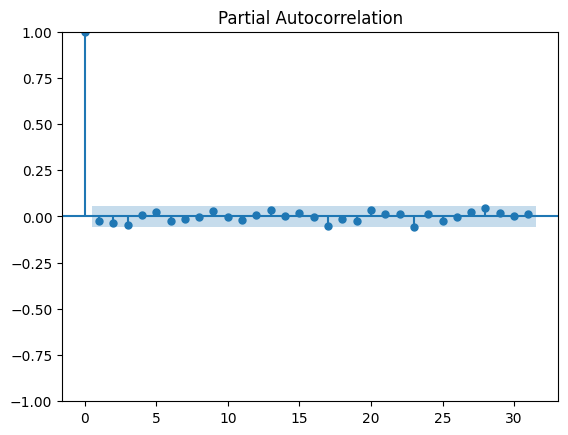

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_pacf(first_diffs)
plt.show()
plt.tight_layout()
#to find the order of AR

We can see that for both the ACF and PACf, they are only significant at lag (0) and falls off significantly past that

Traditional models such as the ARIMA model is thus not very suitable to forecaset future values for microsoft

Does this mean we cannot use the ARIMA model? since the model is resembling that of the **random walk/white noise**

We can also implement the Ljung–Box test to confirm if they are indeed a white noise model

In [ ]:
mod2 = sm.tsa.arima.ARIMA(first_diffs, order=(0, 1, 0))
res = mod2.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 1254
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4302.696
Date:                Tue, 30 Dec 2025   AIC                           8607.393
Time:                        05:58:20   BIC                           8612.526
Sample:                             0   HQIC                          8609.322
                               - 1254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        56.2596      1.546     36.380      0.000      53.229      59.291
Ljung-Box (L1) (Q):                 309.53   Jarque-Bera (JB):               259.04
Prob(Q):                              0.00   Pr

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



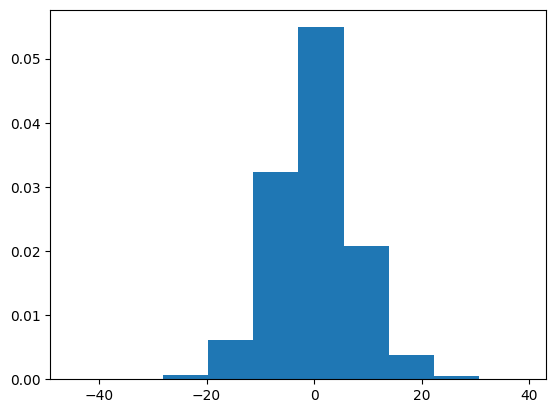

In [ ]:
residual = res.resid
plt.hist(residual, density=True)
plt.show()


How do we actually use the ARIMA model? do we add the residuals?

# LTSM model

We must first understand that LTSM requires the input to be of a 3D shape
i.e. in (sample, time step, feature)
since our data is all univariate, its feature will always be 1 since there is only one "output" at each time step


there is a total of 1255 "rows/output" and we are interested in lets say 20 days worth of previous data to predict the future day

think of it as:

  [1,2,3] | 4

  [2,3,4] | 5

  [3,4,5] | 6

  where we would have, 1 feature, a time step of 3, and a sample size of 3 in this small example

In [ ]:
df.columns

Index(['MSFT'], dtype='object')

In [ ]:
df[-10::1].sort_index(ascending=False)
#from bottom 10 to the last, with a step size forward of 1 , in descening order

,MSFT
Date,
2025-12-29,487.100006
2025-12-26,487.709991
2025-12-24,488.019989
2025-12-23,486.850006
2025-12-22,484.920013
2025-12-19,485.920013
2025-12-18,483.980011
2025-12-17,476.119995
2025-12-16,476.390015


from matplotlib import pyplot as plt
_df_0['MSFT'].plot(kind='hist', bins=20, title='MSFT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MSFT'].plot(kind='line', figsize=(8, 4), title='MSFT')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
train_size = int(len(df) * 0.8)

train_df = df.iloc[:train_size]
test_df  = df.iloc[train_size:]


In [ ]:
normalizer = MinMaxScaler(feature_range=(0,1))
train_df_scaled = normalizer.fit_transform(np.array(df))
test_df_scaled = normalizer.transform(np.array(df))

#normalize our data from a range of 0 to 1 so that model performs better instead of taking
#large values as input

In [ ]:
x_train = []
y_train = []
#initilize empty arrays to find the "3D shape" later

for i in range(45, 1255):
    x_train.append(train_df_scaled[i-45:i, 0])
    # in other words => first iteration: [45-45:45, column index: 0] (from zero until row 44) with column being the close price
    # => segunda iteration: [46-45:46, collumn index: 0] (from 1 until 45)
    # => segunda iteration: [47-45:47, collumn index: 0] (from 2 until 46)
    # etc
    y_train.append(train_df_scaled[i, 0])  # in other words => stores the index that it wants to predict


x_train, y_train = np.array(x_train), np.array(y_train) # I want the data to be in an numpy array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# Reshape method will create dimensions (it will have 3 dimensions: the two we had and one more)
# NOTICE == >> we have to reshape our data to 3D because tensorflow requires it to run

In [ ]:
inputs = np.concatenate(
    (train_df_scaled[-45:], test_df_scaled),
    axis=0
)
inputs


array([[0.94538883],
       [0.96878948],
       [1.        ],
       ...,
       [0.8428033 ],
       [0.8418845 ],
       [0.84007658]])

In [ ]:
x_test = []
y_test = []

for i in range(45, len(inputs)):
    x_test.append(inputs[i-45:i, 0])
    y_test.append(inputs[i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [ ]:
x_train.shape


(1255, 45, 1)

In [ ]:
x_test.shape

(1255, 45, 1)